# Project 2 - Investigating Baseball Data

Christian Guzman

May 2017

## I. **Introduction**

In this study I will look at the characteristics of higher paid players and how their metrics compare. I will also look at the relationships between variables, specifically homeruns and other batting statistics.


**Questions**
1. What are the characteristics of baseball players with the highest salaries?
    * Do players with higher salaries truly have more homeruns (and other stats)?
2. What relationships are there with Homeruns and other metrics?
    * Do players with more homeruns, get walked(IBB) or hit by pitches(HBP) more?
    
    
These are the broad questions that I will attempt to answer in this study. I will look at what characteristics the players with higher salaries have, show they have more homeruns on average. After this I will plot homeruns against other variables in scatter plots, and calculate correlations.

## II. **Data Wrangling**

In [92]:
import pandas as pd
import numpy as np
import os

In [93]:
print(os.getcwd())

C:\Users\cguzm_000\Documents\baseballdatabank-2017.1\core


In [94]:
path = 'C:\\Users\\cguzm_000\\Documents\\baseballdatabank-2017.1\\core'
os.chdir(path)

In [95]:
os.listdir('.')

['AllstarFull.csv',
 'Appearances.csv',
 'AwardsManagers.csv',
 'AwardsPlayers.csv',
 'AwardsShareManagers.csv',
 'AwardsSharePlayers.csv',
 'Batting.csv',
 'BattingPost.csv',
 'CollegePlaying.csv',
 'Fielding.csv',
 'FieldingOF.csv',
 'FieldingOFsplit.csv',
 'FieldingPost.csv',
 'HallOfFame.csv',
 'HomeGames.csv',
 'Managers.csv',
 'ManagersHalf.csv',
 'Master.csv',
 'Parks.csv',
 'Pitching.csv',
 'PitchingPost.csv',
 'readme2014.txt',
 'Salaries.csv',
 'Schools.csv',
 'SeriesPost.csv',
 'Teams.csv',
 'TeamsFranchises.csv',
 'TeamsHalf.csv']

In [96]:
# Tables to be looked at:
# Master*, Batting*, AwardsPlayers, AllstarFull, Salaries

master = pd.read_csv('Master.csv')
batting = pd.read_csv('Batting.csv')
pitching = pd.read_csv('Pitching.csv')
salaries = pd.read_csv('Salaries.csv')
awards = pd.read_csv('AwardsPlayers.csv')
allstar = pd.read_csv('AllstarFull.csv')
fielding = pd.read_csv('Fielding.csv')

tables = [master, batting, pitching, salaries, awards, allstar, fielding]
table_names = ['master', 'batting', 'pitching', 'salaries', 'awards', 'allstar', 'fielding']
frames = {'Master': master, 'Batting': batting, 'Pitching': pitching, 
         'Salaries': salaries, 'Awards': awards, 'Allstar': allstar, 'Fielding': fielding}

In [8]:
# Check yearID boundaries for all tables...
i = 0
for t in tables:
    if 'yearID' not in t.head(0):
        print('table ' + table_names[i] + ' does not have column \'yearID\'.')
        i += 1
    else:
        print('table ' + table_names[i] + ' has column \'yearID\'.')
        i += 1

table master does not have column 'yearID'.
table batting has column 'yearID'.
table pitching has column 'yearID'.
table salaries has column 'yearID'.
table awards has column 'yearID'.
table allstar has column 'yearID'.
table fielding has column 'yearID'.


Looking at which data tables can be filtered by 'yearID'.

In [9]:
# Check min year for each table
i = 1
yearValues = []
for t in tables[1:]:
    print('table ' + table_names[i] + ' oldest yearID is... ' + str(t.yearID.min()))
    yearValues.append(t.yearID.min())
    i+=1
    
print('\nThe latest year in these tables is ' + str(max(yearValues)) + '. As such the data will begin from there.')
    


table batting oldest yearID is... 1871
table pitching oldest yearID is... 1871
table salaries oldest yearID is... 1985
table awards oldest yearID is... 1877
table allstar oldest yearID is... 1933
table fielding oldest yearID is... 1871

The latest year in these tables is 1985. As such the data will begin from there.


Filtering out data prior to 1985...

In [10]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [11]:
# fromYear function will make data from the year 
def fromYear(tables, year):
    i = 1
    global tables_fromYear, table_names_fromYear
    tables_fromYear = []
    table_names_fromYear = []
    for t in tables[1:]:
        t = t[t.yearID >= year]
        tables_fromYear.append(t)
        table_names_fromYear.append(table_names[i])
        print ('table ' + str(table_names[i]) + ' has ' + str(len(t)) + ' rows, beginning from ' + str(year) + '.')
        i+=1

In [12]:
fromYear(tables, year=1985)

table batting has 40577 rows, beginning from 1985.
table pitching has 19983 rows, beginning from 1985.
table salaries has 26428 rows, beginning from 1985.
table awards has 2398 rows, beginning from 1985.
table allstar has 2125 rows, beginning from 1985.
table fielding has 52558 rows, beginning from 1985.


In [13]:
table_names_fromYear

['batting', 'pitching', 'salaries', 'awards', 'allstar', 'fielding']

In [14]:
print('variable \'tables_1985\' contains a list\n of tables with data having yearID greater than or equal to 1985')

variable 'tables_1985' contains a list
 of tables with data having yearID greater than or equal to 1985


In [15]:
batting1985 = tables_fromYear[0]
pitching1985 = tables_fromYear[1]
awards1985 = tables_fromYear[3]
allstar1985 = tables_fromYear[4]
fielding1985 = tables_fromYear[5]

In [16]:
batting1985.columns.values

array(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP'], dtype=object)

In [17]:
print(len(batting1985))
print(len(pitching1985))
print(len(salaries))
print(len(fielding))

40577
19983
26428
136815


**Choosing variables to analyze for each table.**
1. Master:  playerID, debut, height, weight
2. Batting: playerID, G, AB, H, HR, RBI, SB, CS, BB, SO, IBB, HBP
3. Awards: Awards (number of awards)
4. Allstar: Allstar (number of allstar appearances)
5. Fielding: POS(position)

In [18]:
master = master[['playerID', 'debut', 'finalGame', 'weight', 'height']]
master.head()

,playerID,debut,finalGame,weight,height
0,aardsda01,2004-04-06,2015-08-23,215.0,75.0
1,aaronha01,1954-04-13,1976-10-03,180.0,72.0
2,aaronto01,1962-04-10,1971-09-26,190.0,75.0
3,aasedo01,1977-07-26,1990-10-03,190.0,75.0
4,abadan01,2001-09-10,2006-04-13,184.0,73.0


Using debut variable, a years of experience column will be created.

In [19]:
len(master)

19105

In [20]:
type(master['debut'][0])

str

The debut variable is in the string format so it will have to be converted into a date time object.

With debut year extracted from string type 'debut' column years of experience can be calculated. The goal is to count the years of experience up until the beginning of the 2016 season.

The extract_year function works on the 10 rows of the data it was tested on. Now to apply it to the rest of the dataset. But before this, we should check for NaN values in the debut column and remove them.

In [21]:
# Check for any null values
master.isnull().values.any()

True

Our check tells there are null values.

In [22]:
#Number of rows:
#Before removing null values
print(str(len(master)) + ' rows before removing null values.')
#After
print(str(len(master.dropna())) + ' rows after removing null values.')
print('Difference in number of rows: ' + str(len(master) - len(master.dropna())))

19105 rows before removing null values.
18108 rows after removing null values.
Difference in number of rows: 997


In [23]:
master = master.dropna()

def extract_year(df):
    d = df['debut']
    f = df['finalGame']

    m0 = pd.DataFrame({
            'debut_date': pd.to_datetime(d).dt.date,
            'debut_year': pd.to_datetime(d).dt.year,
            'final_date': pd.to_datetime(f).dt.date,
            'final_year': pd.to_datetime(f).dt.year
            })

    m1 = df
    m1.loc[:,'debutYear'] = m0['debut_year']
    m1.loc[:,'finalYear'] = m0['final_year']
    
    return m1

master = extract_year(master)
master.head()

,playerID,debut,finalGame,weight,height,debutYear,finalYear
0,aardsda01,2004-04-06,2015-08-23,215.0,75.0,2004,2015
1,aaronha01,1954-04-13,1976-10-03,180.0,72.0,1954,1976
2,aaronto01,1962-04-10,1971-09-26,190.0,75.0,1962,1971
3,aasedo01,1977-07-26,1990-10-03,190.0,75.0,1977,1990
4,abadan01,2001-09-10,2006-04-13,184.0,73.0,2001,2006


This function will extract year from the **debut** and **finalGame** columns and create new columns **debutYear** and **finalYear** with just the years as shown in the dataframe above.

In [24]:
master = master[['playerID', 'debutYear', 'finalYear', 'height', 'weight']]
master.head()

,playerID,debutYear,finalYear,height,weight
0,aardsda01,2004,2015,75.0,215.0
1,aaronha01,1954,1976,72.0,180.0
2,aaronto01,1962,1971,75.0,190.0
3,aasedo01,1977,1990,75.0,190.0
4,abadan01,2001,2006,73.0,184.0


In [25]:
career = master.finalYear.values - master.debutYear.values
master['career'] = career
master.head()

,playerID,debutYear,finalYear,height,weight,career
0,aardsda01,2004,2015,75.0,215.0,11
1,aaronha01,1954,1976,72.0,180.0,22
2,aaronto01,1962,1971,75.0,190.0,9
3,aasedo01,1977,1990,75.0,190.0,13
4,abadan01,2001,2006,73.0,184.0,5


The **career** variable represents years in the league for each player.

Since I will be analyzing player salaries I will have to merge the dataframes to ensure all the players have data in the salaries table.

In [26]:
print(len(salaries))
#Check for any null values.
salaries.isnull().values.any()
#Group salaries by playerID.
salaries_grouped = salaries['salary'].groupby(salaries['playerID'])

26428


In [27]:
salaries_grouped = salaries_grouped.mean().reset_index()
salaries_grouped.head()

,playerID,salary
0,aardsda01,1322821
1,aasedo01,575000
2,abadan01,327000
3,abadfe01,753280
4,abbotje01,246250


In [28]:
print(len(salaries_grouped))

5155


With grouping we now have 5155 rows in the salaries data.
Without independent variable, salary being the average salary of players from 1985, we can begin to group the rest of the dependent variables in the same manner.

**Preparing batting table**

In [29]:
# Grouping tables by playerID.
# 1. Batting, awards, allstar

batting = batting[['playerID', 'G','AB','H','HR','RBI', 
                   'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP']]

batting_grouped = batting.groupby('playerID').sum().reset_index()
# main dataframe that will encompass all variables we need for analysis.
df = pd.merge(batting_grouped, salaries_grouped, on='playerID')
print(str(len(df)) + ' rows.')

df.head()

5147 rows.


,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,salary
0,aardsda01,331,4,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1322821
1,aasedo01,448,5,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,575000
2,abadan01,15,21,2,0,0.0,0.0,1.0,4,5.0,0.0,0.0,327000
3,abadfe01,315,9,1,0,0.0,0.0,0.0,0,5.0,0.0,0.0,753280
4,abbotje01,233,596,157,18,83.0,6.0,5.0,38,91.0,2.0,3.0,246250


We will continue to clean and merge the tables into the df dataframe.

**Preparing Awards table**

In [30]:
awards.head()

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


In [31]:
len(awards)

6158

In [32]:
awards_grouped = awards.groupby('playerID')
awards_count = awards_grouped.agg(['count']).reset_index()[['playerID', 'awardID']]
awards_count.columns = ['playerID', 'Awards']
awards_count
# Left join df and awards_count
df = pd.merge(df, awards_count, on='playerID', how='left')

In [33]:
# Replace na values with 0.
df = df.fillna(0)
df[df.Awards == 0].head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,salary,Awards
0,aardsda01,331,4,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1322821,0.0
1,aasedo01,448,5,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,575000,0.0
2,abadan01,15,21,2,0,0.0,0.0,1.0,4,5.0,0.0,0.0,327000,0.0
3,abadfe01,315,9,1,0,0.0,0.0,0.0,0,5.0,0.0,0.0,753280,0.0
4,abbotje01,233,596,157,18,83.0,6.0,5.0,38,91.0,2.0,3.0,246250,0.0


In [34]:
# Check for any null values
df.isnull().values.any()

False

**Preparing Allstar table**

In [35]:
allstar[allstar.duplicated('yearID')].head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0
5,cronijo01,1933,0,ALS193307060,WS1,AL,1.0,6.0


In [36]:
allstar[allstar.playerID == 'rodrial01']
print('Alex Rodriguez has been on an allstar game roster ' + str(len(allstar[allstar.playerID == 'rodrial01'])) + ' times.')

Alex Rodriguez has been on an allstar game roster 14 times.


In [37]:
# rodrial01
df[df.playerID == 'rodrial01']

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,salary,Awards
3972,rodrial01,2784,10566,3115,696,2086.0,329.0,76.0,1338,2287.0,97.0,176.0,18109829,31.0


In [38]:
allstar = allstar[['playerID','gameID']]
allstar = allstar.groupby('playerID').agg(['count']).reset_index()
allstar.columns = ['playerID', 'Allstar']

In [39]:
allstar.head()

,playerID,Allstar
0,aaronha01,25
1,aasedo01,1
2,abreubo01,2
3,abreujo02,1
4,adamsac01,1


In [40]:
df = pd.merge(df, allstar, on='playerID', how='left')
len(df)

5147

In [41]:
df.head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,salary,Awards,Allstar
0,aardsda01,331,4,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1322821,0.0,NaN
1,aasedo01,448,5,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,575000,0.0,1.0
2,abadan01,15,21,2,0,0.0,0.0,1.0,4,5.0,0.0,0.0,327000,0.0,NaN
3,abadfe01,315,9,1,0,0.0,0.0,0.0,0,5.0,0.0,0.0,753280,0.0,NaN
4,abbotje01,233,596,157,18,83.0,6.0,5.0,38,91.0,2.0,3.0,246250,0.0,NaN


The new Allstar column has NaN due to the choice to merge dataframes via a left join. The NaN represent players who did not achieve awards, as such they will be filled with 0.

In [42]:
df.Allstar = df['Allstar'].fillna(0)
df.head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,salary,Awards,Allstar
0,aardsda01,331,4,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1322821,0.0,0.0
1,aasedo01,448,5,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,575000,0.0,1.0
2,abadan01,15,21,2,0,0.0,0.0,1.0,4,5.0,0.0,0.0,327000,0.0,0.0
3,abadfe01,315,9,1,0,0.0,0.0,0.0,0,5.0,0.0,0.0,753280,0.0,0.0
4,abbotje01,233,596,157,18,83.0,6.0,5.0,38,91.0,2.0,3.0,246250,0.0,0.0


In [43]:
colnames = df.columns.values
colnames

array(['playerID', 'G', 'AB', 'H', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'salary', 'Awards', 'Allstar'], dtype=object)

In [44]:
# Convert Awards floats to ints

df.Awards = df['Awards'].astype(int)
df.Allstar = df['Allstar'].astype(int)
df.RBI = df['RBI'].astype(int)

In [45]:
df.head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,salary,Awards,Allstar
0,aardsda01,331,4,0,0,0,0.0,0.0,0,2.0,0.0,0.0,1322821,0,0
1,aasedo01,448,5,0,0,0,0.0,0.0,0,3.0,0.0,0.0,575000,0,1
2,abadan01,15,21,2,0,0,0.0,1.0,4,5.0,0.0,0.0,327000,0,0
3,abadfe01,315,9,1,0,0,0.0,0.0,0,5.0,0.0,0.0,753280,0,0
4,abbotje01,233,596,157,18,83,6.0,5.0,38,91.0,2.0,3.0,246250,0,0


Last data table to merge will be the master table for the 'debut' column.

In [46]:
df = pd.merge(df, master, on='playerID')

In [47]:
df.isnull().values.any()

False

In [48]:
df.head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,IBB,HBP,salary,Awards,Allstar,debutYear,finalYear,height,weight,career
0,aardsda01,331,4,0,0,0,0.0,0.0,0,2.0,0.0,0.0,1322821,0,0,2004,2015,75.0,215.0,11
1,aasedo01,448,5,0,0,0,0.0,0.0,0,3.0,0.0,0.0,575000,0,1,1977,1990,75.0,190.0,13
2,abadan01,15,21,2,0,0,0.0,1.0,4,5.0,0.0,0.0,327000,0,0,2001,2006,73.0,184.0,5
3,abadfe01,315,9,1,0,0,0.0,0.0,0,5.0,0.0,0.0,753280,0,0,2010,2016,73.0,220.0,6
4,abbotje01,233,596,157,18,83,6.0,5.0,38,91.0,2.0,3.0,246250,0,0,1997,2001,74.0,190.0,4


In [49]:
# Batting Average
BAVG = df['H'] / df['AB']
df['AVG'] = BAVG.round(3)
df.head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,...,HBP,salary,Awards,Allstar,debutYear,finalYear,height,weight,career,AVG
0,aardsda01,331,4,0,0,0,0.0,0.0,0,2.0,...,0.0,1322821,0,0,2004,2015,75.0,215.0,11,0.000
1,aasedo01,448,5,0,0,0,0.0,0.0,0,3.0,...,0.0,575000,0,1,1977,1990,75.0,190.0,13,0.000
2,abadan01,15,21,2,0,0,0.0,1.0,4,5.0,...,0.0,327000,0,0,2001,2006,73.0,184.0,5,0.095
3,abadfe01,315,9,1,0,0,0.0,0.0,0,5.0,...,0.0,753280,0,0,2010,2016,73.0,220.0,6,0.111
4,abbotje01,233,596,157,18,83,6.0,5.0,38,91.0,...,3.0,246250,0,0,1997,2001,74.0,190.0,4,0.263


**Removing pure pitchers from analysis.**

In [50]:
fielding1985 = fielding1985[['playerID', 'POS']]
fielding1985.isnull().values.any()

fielding1985.head()

,playerID,POS
84257,aasedo01,P
84258,abregjo01,P
84259,ackerji01,P
84260,adamsri02,2B
84261,adamsri02,3B


This new fielding1985 table will be used to filter out players with P as their position later on, when merging tables.

In [51]:
fielding1985.duplicated().values.any()

True

In [52]:
fielding1985 = fielding1985.drop_duplicates()
fielding1985.duplicated().values.any()

False

In [53]:
fielding1985.isnull().values.any()

False

In [54]:
remove = fielding1985[fielding1985.POS == 'P']
merged = pd.merge(df, remove, on='playerID', how='left', indicator=True)
merged.head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,...,Awards,Allstar,debutYear,finalYear,height,weight,career,AVG,POS,_merge
0,aardsda01,331,4,0,0,0,0.0,0.0,0,2.0,...,0,0,2004,2015,75.0,215.0,11,0.000,P,both
1,aasedo01,448,5,0,0,0,0.0,0.0,0,3.0,...,0,1,1977,1990,75.0,190.0,13,0.000,P,both
2,abadan01,15,21,2,0,0,0.0,1.0,4,5.0,...,0,0,2001,2006,73.0,184.0,5,0.095,NaN,left_only
3,abadfe01,315,9,1,0,0,0.0,0.0,0,5.0,...,0,0,2010,2016,73.0,220.0,6,0.111,P,both
4,abbotje01,233,596,157,18,83,6.0,5.0,38,91.0,...,0,0,1997,2001,74.0,190.0,4,0.263,NaN,left_only


The **remove** dataframe consists of the players with position 'P' as in pitcher. The dataframe represents the players that will be removed from our **df** dataframe.

In [55]:
merged = merged[merged.POS != 'P']
merged.head()

,playerID,G,AB,H,HR,RBI,SB,CS,BB,SO,...,Awards,Allstar,debutYear,finalYear,height,weight,career,AVG,POS,_merge
2,abadan01,15,21,2,0,0,0.0,1.0,4,5.0,...,0,0,2001,2006,73.0,184.0,5,0.095,NaN,left_only
4,abbotje01,233,596,157,18,83,6.0,5.0,38,91.0,...,0,0,1997,2001,74.0,190.0,4,0.263,NaN,left_only
6,abbotku01,702,2044,523,62,242,22.0,11.0,133,571.0,...,0,0,1993,2001,71.0,180.0,8,0.256,NaN,left_only
9,abercre01,180,386,86,9,34,18.0,8.0,21,123.0,...,0,0,2006,2008,75.0,215.0,2,0.223,NaN,left_only
10,abernbr01,232,868,212,8,79,21.0,7.0,60,93.0,...,0,0,2001,2005,73.0,185.0,4,0.244,NaN,left_only


In [56]:
df = merged
df = df[['playerID', 'H','AVG', 'HR', 'SB', 'CS', 'BB', 'SO',
        'IBB', 'HBP', 'height', 'weight', 'career', 
        'Awards', 'Allstar', 'debutYear', 'salary']]
df.head()

,playerID,H,AVG,HR,SB,CS,BB,SO,IBB,HBP,height,weight,career,Awards,Allstar,debutYear,salary
2,abadan01,2,0.095,0,0.0,1.0,4,5.0,0.0,0.0,73.0,184.0,5,0,0,2001,327000
4,abbotje01,157,0.263,18,6.0,5.0,38,91.0,2.0,3.0,74.0,190.0,4,0,0,1997,246250
6,abbotku01,523,0.256,62,22.0,11.0,133,571.0,11.0,17.0,71.0,180.0,8,0,0,1993,470777
9,abercre01,86,0.223,9,18.0,8.0,21,123.0,2.0,7.0,75.0,215.0,2,0,0,2006,327000
10,abernbr01,212,0.244,8,21.0,7.0,60,93.0,1.0,7.0,73.0,185.0,4,0,0,2001,257500


In [57]:
df.isnull().values.any()

True

In [58]:
len(df)

2336

In [59]:
df.duplicated().values.any()

False

In [60]:
df = df.reset_index()
df = df[['playerID', 'H','AVG', 'HR', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'height', 'weight', 'career', 
         'Awards', 'Allstar', 'debutYear', 'salary']]
df.head()

,playerID,H,AVG,HR,SB,CS,BB,SO,IBB,HBP,height,weight,career,Awards,Allstar,debutYear,salary
0,abadan01,2,0.095,0,0.0,1.0,4,5.0,0.0,0.0,73.0,184.0,5,0,0,2001,327000
1,abbotje01,157,0.263,18,6.0,5.0,38,91.0,2.0,3.0,74.0,190.0,4,0,0,1997,246250
2,abbotku01,523,0.256,62,22.0,11.0,133,571.0,11.0,17.0,71.0,180.0,8,0,0,1993,470777
3,abercre01,86,0.223,9,18.0,8.0,21,123.0,2.0,7.0,75.0,215.0,2,0,0,2006,327000
4,abernbr01,212,0.244,8,21.0,7.0,60,93.0,1.0,7.0,73.0,185.0,4,0,0,2001,257500


Analysis can now be done without pitchers being in the data.

## III. Exploratory Analysis

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

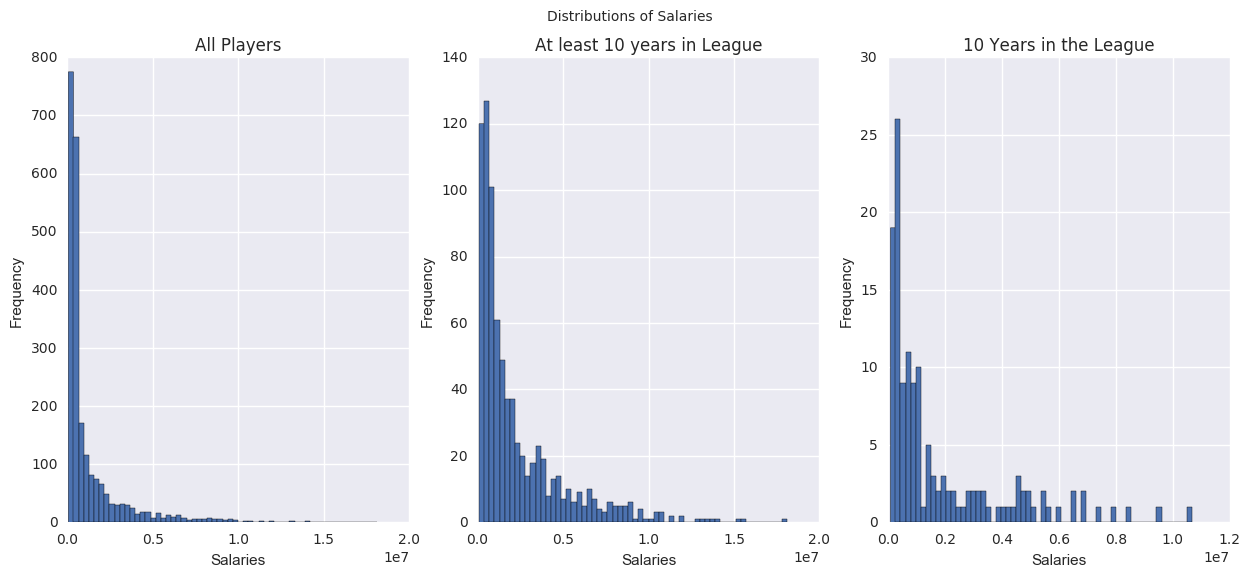

In [99]:
# Career equal to 10 years
df_ten_years = df[df.career == 10]
# Career greater than and equal to 10 years
dfm = df[df.career >= 10]
datasets = [df, dfm, df_ten_years]

#Plotting salary distributions
titles = ['All Players', 'At least 10 years in League', '10 Years in the League']
fig, axes = plt.subplots(1, 3,figsize=(15,6)); fig.suptitle('Distributions of Salaries')
for i in list(range(0,3)):
    axes[i].hist(datasets[i].salary, bins=60)
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Frequency'); axes[i].set_xlabel('Salaries')
    

The distribution of player salaries for players shows a less right skew than the extreme that was seen before excluding players with less than 10 years in the league.

In [63]:
from __future__ import division
# Proportion of players with less than $600000 salary
p = len(df[df.salary < 600000]) / len(df)
round(p,3)

0.596

Approximately 60% of players have less than 600 thousand dollar salary, this makes for a highly right skewed distribution since there are players averaging upwards up to 10 to 20 million dollars a year.

In order to explore the characteristics of players with higher salaries I had to recognize that there are a large amount of players in the MLB who make around the bare minimum salary of 500 thousand. This skews the data because in the MLB a player coming into the league in their first 3 years is given the minimum salary. It is only until 6 full years in the majors are players allowed to sign with the highest bidder. I want to look at players who have had more than 6 years in order to analyze players by their perceived value, not by the default and minimum salary. 

In [64]:
# 50% quantile
def groupbysalary(x):
    global g1, g2
    q = int(x.quantile(0.5))
    g1 = dfm[x <= x.quantile(0.5)]
    g2 = dfm[x > x.quantile(0.5)]
    
    print ('There are ' + str(len(g1)) + ' players with salary less than or equal to ' \
           + '$'+ str(q) + ' and ' + str(len(g2)) + ' with salary greater than ' + '$' +str(q))

This function separates players with less than average and above average salaries into two groups **g1** and **g2** respectively.

In [65]:
dfm = dfm[['H', 'AVG', 'HR', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP','height', 'weight',
          'career', 'Awards', 'Allstar', 'salary']]
dfm.head()

,H,AVG,HR,SB,CS,BB,SO,IBB,HBP,height,weight,career,Awards,Allstar,salary
6,2470,0.291,288,400.0,128.0,1476,1840.0,115.0,33.0,72.0,220.0,18,2,2,7773729
25,1532,0.284,146,53.0,17.0,596,617.0,22.0,41.0,71.0,210.0,11,2,1,3935750
27,1031,0.260,47,81.0,50.0,500,624.0,25.0,48.0,69.0,165.0,14,0,0,693500
33,846,0.254,36,128.0,60.0,250,636.0,24.0,6.0,75.0,180.0,14,0,0,253750
34,31,0.233,2,3.0,0.0,8,29.0,0.0,1.0,74.0,245.0,10,0,0,414000


In [66]:
groupbysalary(dfm.salary)

There are 399 players with salary less than or equal to $1232250 and 399 with salary greater than $1232250


In [67]:
g1.describe()

,H,AVG,HR,SB,CS,BB,SO,IBB,HBP,height,weight,career,Awards,Allstar,salary
count,399.00000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,3.990000e+02
mean,921.14787,0.255333,82.779449,67.769424,35.411028,339.654135,547.829574,31.205514,23.969925,72.423559,186.701754,12.847118,0.924812,0.812030,5.949799e+05
std,623.78613,0.021719,81.350359,94.216723,35.082551,260.518898,332.584581,32.869513,24.725917,1.935790,18.092275,2.684253,2.500117,2.068489,2.958588e+05
min,10.00000,0.106000,0.000000,0.000000,0.000000,6.000000,22.000000,0.000000,0.000000,66.000000,145.000000,10.000000,0.000000,0.000000,8.500000e+04
25%,470.50000,0.243000,27.000000,9.000000,10.000000,148.500000,310.000000,8.000000,9.000000,71.000000,175.000000,11.000000,0.000000,0.000000,3.515630e+05
50%,781.00000,0.257000,56.000000,29.000000,23.000000,276.000000,503.000000,22.000000,17.000000,73.000000,185.000000,12.000000,0.000000,0.000000,5.569160e+05
75%,1241.50000,0.270000,104.500000,87.500000,51.500000,453.000000,697.000000,41.500000,31.500000,74.000000,195.000000,14.000000,0.000000,1.000000,8.214625e+05
max,4256.00000,0.328000,563.000000,668.000000,187.000000,1605.000000,2597.000000,193.000000,267.000000,78.000000,250.000000,24.000000,16.000000,18.000000,1.232000e+06


In [68]:
g2.describe()

,H,AVG,HR,SB,CS,BB,SO,IBB,HBP,height,weight,career,Awards,Allstar,salary
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,3.990000e+02
mean,1600.644110,0.273867,201.862155,129.125313,50.548872,607.701754,994.401003,57.255639,53.486216,72.814536,197.508772,13.614035,4.065163,2.766917,4.087245e+06
std,602.344034,0.017887,131.727042,147.590801,41.163383,332.430200,382.599512,58.493266,37.981802,2.110202,22.961171,3.011937,6.333745,3.292798,2.885068e+06
min,462.000000,0.229000,11.000000,2.000000,2.000000,106.000000,292.000000,0.000000,2.000000,67.000000,145.000000,10.000000,0.000000,0.000000,1.232500e+06
25%,1166.000000,0.262000,108.000000,34.500000,21.000000,372.000000,707.500000,22.000000,28.000000,71.000000,180.000000,11.000000,0.000000,0.000000,1.903416e+06
50%,1503.000000,0.273000,168.000000,85.000000,39.000000,526.000000,953.000000,39.000000,45.000000,73.000000,195.000000,13.000000,1.000000,2.000000,3.273133e+06
75%,1959.500000,0.285000,282.000000,175.000000,68.000000,761.000000,1238.000000,72.000000,69.000000,74.000000,215.000000,16.000000,5.000000,4.000000,5.374860e+06
max,3465.000000,0.338000,762.000000,1406.000000,335.000000,2558.000000,2548.000000,688.000000,285.000000,80.000000,295.000000,25.000000,47.000000,19.000000,1.810983e+07


Looking at these two dataframes that show the descriptive statistics or 'descriptives' I can begin to get a glimpse at the differences between the two populations of players. A good way to do this is to compare the means between the two groups for the different variables.

In [69]:
dfofMeans = pd.DataFrame([g1.mean(), g2.mean()], index=[['Group1','Group2']])
a = ['H', 'AVG', 'HR', 'SB', 'CS', 'BB', 'SO',
       'IBB', 'HBP', 'height', 'weight', 
     'career', 'Awards', 'Allstar', 'salary']
dfofMeans.loc[:,a]

,H,AVG,HR,SB,CS,BB,SO,IBB,HBP,height,weight,career,Awards,Allstar,salary
Group1,921.14787,0.255333,82.779449,67.769424,35.411028,339.654135,547.829574,31.205514,23.969925,72.423559,186.701754,12.847118,0.924812,0.812030,5.949799e+05
Group2,1600.64411,0.273867,201.862155,129.125313,50.548872,607.701754,994.401003,57.255639,53.486216,72.814536,197.508772,13.614035,4.065163,2.766917,4.087245e+06


With this dataframe of means we can begin to imagine that players with above average salaries get more hits, homeruns, might be taller and weigh more, have more awards and allstar appearances.

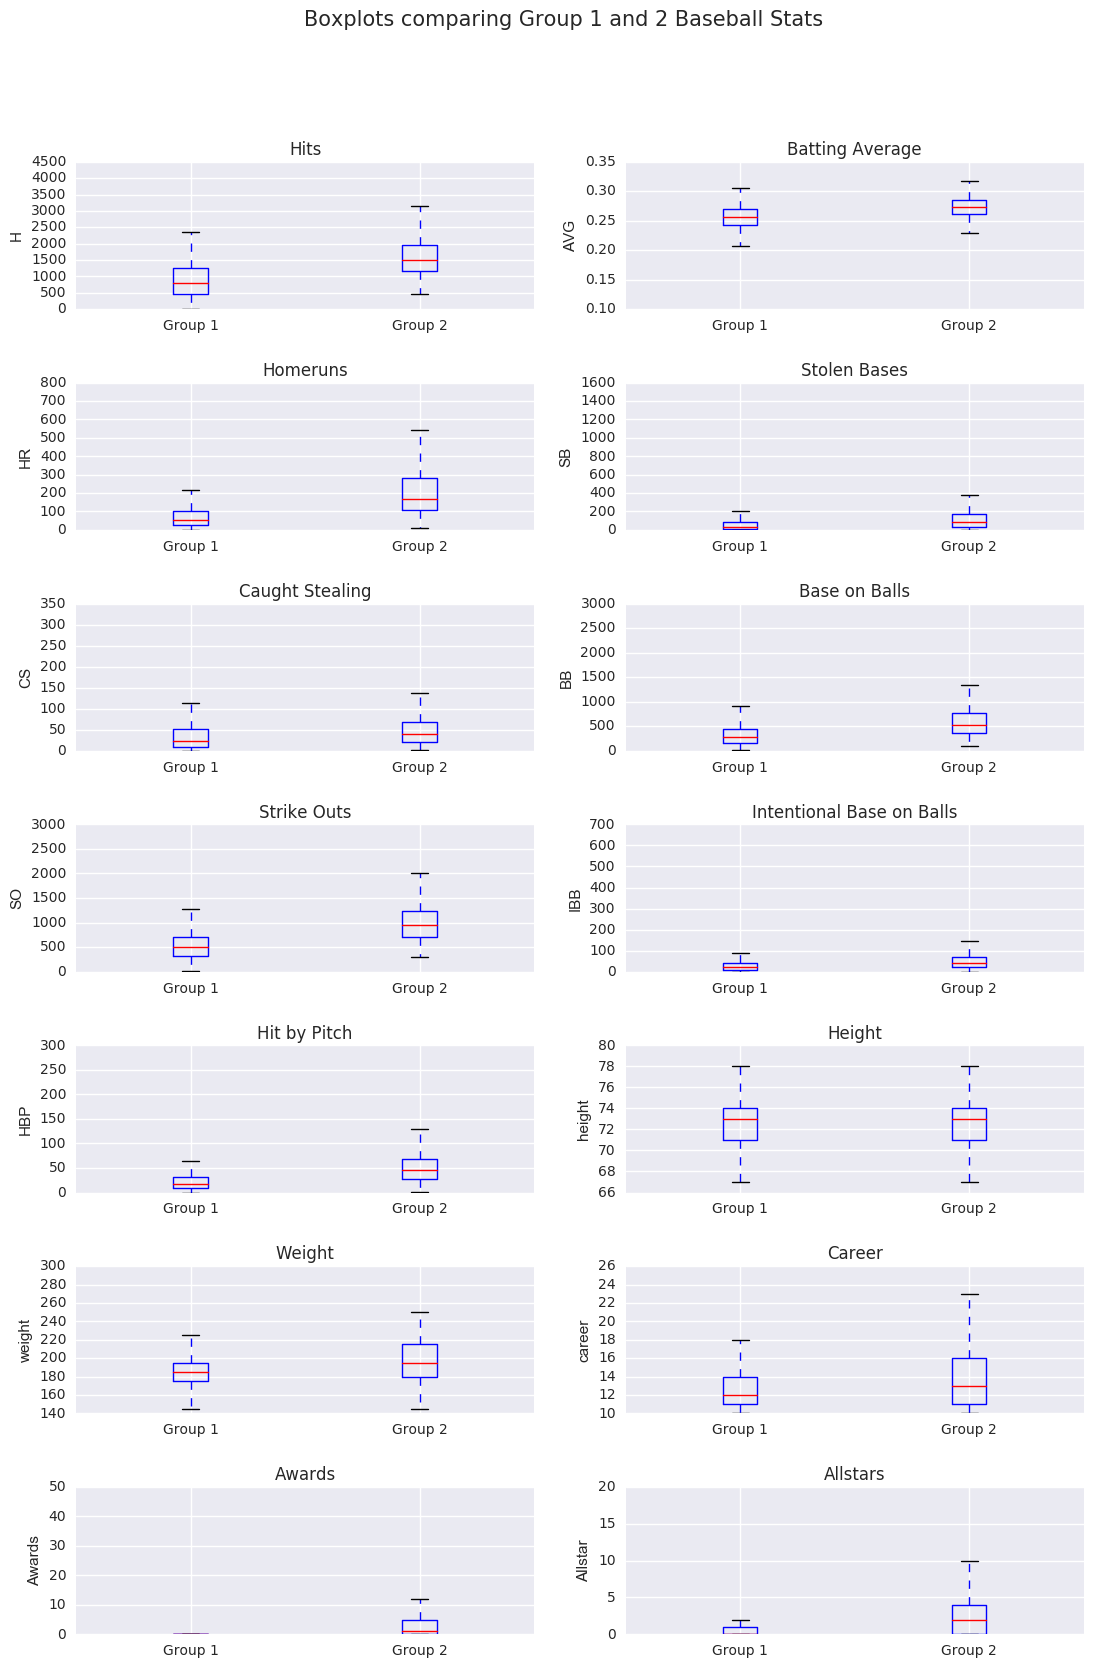

In [100]:
plot_titles = ['Hits', 'Batting Average', 'Homeruns', 'Stolen Bases', 'Caught Stealing', 'Base on Balls', 'Strike Outs',
              'Intentional Base on Balls', 'Hit by Pitch', 'Height', 'Weight', 'Career', 'Awards', 'Allstars']
fig2, axes = plt.subplots(7,2, figsize=(13, 19))
fig2.suptitle('Boxplots comparing Group 1 and 2 Baseball Stats', fontsize=15, fontweight=12)
fig2.subplots_adjust(hspace=0.5)
k=0
for i in range(7):
    for j in range(2):
        axes[i,j].boxplot([g1[g1.columns[k]], g2[g2.columns[k]]])
        axes[i,j].set_title(plot_titles[k])
        axes[i,j].set_ylabel(g1.columns[k])
        axes[i,j].set_xticklabels(['Group 1', 'Group 2'])
        
        k+=1


From these boxplots we can compare the differences between the lower and higher salary players, as well as outliers contributing to the descriptive statistics. From these visualizations we can see where the biggest differences are in.

## Statistical Inference and Hypothesis Testing

To begin to make statistical inferences on the data and to draw conclusions on the population of players with careers of 10 years or more, I will take random samples of sample size of at most 10% of the population.

In [71]:
import random
from scipy import stats

In [72]:
sample_size = int(round(len(dfm) * .10, 0))
print('sample size: ' + str(sample_size))
dfm.sample(sample_size).head()

sample size: 80


,H,AVG,HR,SB,CS,BB,SO,IBB,HBP,height,weight,career,Awards,Allstar,salary
85,775,0.264,9,90.0,36.0,187,164.0,10.0,20.0,71.0,170.0,10,0,0,352500
2211,2160,0.313,383,230.0,76.0,913,1231.0,117.0,138.0,74.0,185.0,16,14,5,7357562
259,1001,0.257,141,57.0,30.0,348,699.0,12.0,47.0,73.0,200.0,10,4,1,2256300
392,1868,0.261,316,24.0,29.0,1012,1235.0,117.0,62.0,70.0,185.0,16,3,6,1300000
1970,48,0.190,1,2.0,1.0,17,35.0,1.0,1.0,69.0,174.0,11,0,0,150000


The first six observations for the random sample of 80 players with careers of at least 10 years.

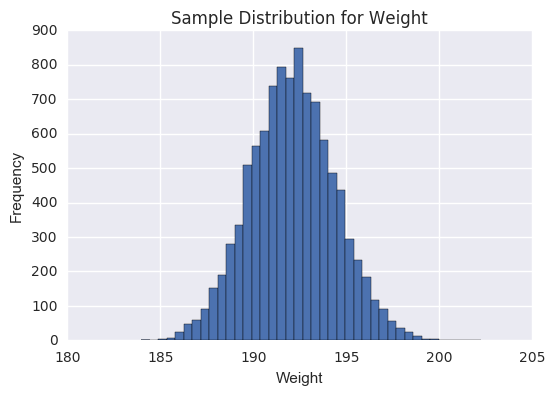

(192.114, 0.080958922410037576)

In [101]:
p_xlabel = {'H':'Hits', 'AVG':'Career Batting Average', 'HR':'Homeruns', 'height':'Height', 'weight':'Weight', 
           'Awards':'Awards Won', 'Allstar':'Allstar Appearances', 'salary':'Salary'}

def meanSampler(x, n, var, hist=True, output=False):
    sample_means = []
    i = 0
    while i < n:
        sample = x.sample(int(.10 * len(x)))
        sample_mean = sample[var].mean()
        sample_means.append(sample_mean)
        
        i += 1
        
    sample_means = pd.Series(sample_means)
    if hist:
        plt.hist(sample_means, bins=40)
        plt.title('Sample Distribution' + ' for ' + p_xlabel[var])
        plt.xlabel(p_xlabel[var])
        plt.ylabel('Frequency')
        plt.show()
    
    N = len(x)
    xbar = round(sample_means.median(), 3)
    s = round((sample_means.std(ddof=1)), 3)
    SE = s / np.sqrt(N)
    if output:
        return xbar, SE
    else:
        print('sample mean: ' + str(xbar))
        print('sample standard deviation: ' + str(s))
        print('standard error: ' + str(SE))

meanSampler(dfm, n=10000, var='weight', hist=True, output=True)

A histogram of 10000 sample means for player weight.

Because our sample sizes are greater than 30(it is 80) our sampling distributions are well approximated by the normal model. As such we can assume that the true means are within **1.96** standard deviations of the sample mean.

**Testing hypotheses using confidence intervals**

In [75]:
def CInt(sample_mean, SE, z=1.96):
    leftPoint = round((sample_mean - z * SE), 3)
    rightPoint = round((sample_mean + z * SE), 3)
    CI = (leftPoint, rightPoint)
    return CI

This function will return a confidence interval. Confidence level can be adjusted by the 'z' argument. In this case a **95%** confidence interval will be constructed.

In [89]:
def CItest(df, df2): 
    ''' df should be dataframe that you wish to build confidence interval for.
        df2 will only compare its sample mean(xbar2) to check if inside boundary.'''
    varNames = df.columns[:-1]
    for i in range(len(varNames)):
        xbar = df[varNames[i]].mean()
        xbar2 = df2[varNames[i]].mean()
        s = round((df[varNames[i]].std(ddof=1)), 3)
        SE = s / np.sqrt(len(df))
        
        
        
        Conf = CInt(sample_mean=xbar, SE=SE, z=1.96)
        if Conf[0] <= xbar2 <= Conf[-1]:
            print('Fail to reject null hypothesis.')
        else:
            print('--' + varNames[i] + '--')
            print('Reject Null hypothesis.')
            print('Confidence Interval: ' + str(Conf)); print(str(round(xbar2, 3))+' Does not lie within confidence interval.\n')
        

I expect higher paid players to generally have higher stats in most categories being analyzed. In order to show this I will use confidence intervals for testing my hypotheses. 

**Null Hypotheses:** There is no significant difference between Lower and Higher Salary group means.
* Fail to reject Null when Lower Salary group(Group 1) sample mean does not lie within confidence interval of Higher Salary(Group 2) sample mean.

**Alternative Hypotheses:** There is significant difference between Lower and Higher Salary group means.
* Reject Null when Lower Salary Group sample mean lies within confidence interval of Higher Salary Group sample mean. 

In [90]:
CItest(df=g2, df2=g1)

--H--
Reject Null hypothesis.
Confidence Interval: (1541.54, 1659.748)
921.148 Does not lie within confidence interval.

--AVG--
Reject Null hypothesis.
Confidence Interval: (0.272, 0.276)
0.255 Does not lie within confidence interval.

--HR--
Reject Null hypothesis.
Confidence Interval: (188.937, 214.788)
82.779 Does not lie within confidence interval.

--SB--
Reject Null hypothesis.
Confidence Interval: (114.643, 143.607)
67.769 Does not lie within confidence interval.

--CS--
Reject Null hypothesis.
Confidence Interval: (46.51, 54.588)
35.411 Does not lie within confidence interval.

--BB--
Reject Null hypothesis.
Confidence Interval: (575.083, 640.321)
339.654 Does not lie within confidence interval.

--SO--
Reject Null hypothesis.
Confidence Interval: (956.859, 1031.943)
547.83 Does not lie within confidence interval.

--IBB--
Reject Null hypothesis.
Confidence Interval: (51.516, 62.995)
31.206 Does not lie within confidence interval.

--HBP--
Reject Null hypothesis.
Confidence In

We are **95%** confident that the true averages for the variables for the Higher Salary group are between their respective intervals. Because the averages for the Lower Salary group are all outside these confidence intervals, we can say that it is plausible to reject the null hypothesis that there is no difference between the means of the two groups.

As such higher paid players can expect to have higher stats across all of the above metrics.

## Relationships between variables.

Keeping track of homerun records and milestones are seen as important parts to following a baseball season. Players with the ability to effectively pull for homeruns affect game strategy considerably and are some of the most exciting players to watch for fans. As such I will look at how Homeruns affect other performance metrics.

(0, 900.0)

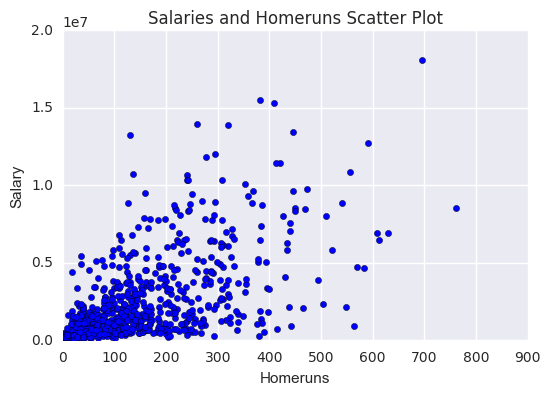

In [102]:
plt.scatter(data=dfm, x='HR', y='salary')
plt.xlabel('Homeruns'), plt.ylabel('Salary'), plt.title('Salaries and Homeruns Scatter Plot')
plt.ylim(ymin=0)
plt.xlim(xmin=0)

Looking at this scatter it may be easy to imagine some linear relationship between homeruns and salary. The more homeruns the more a player gets paid is a logical assumption.

After looking at the scatter plot, I will compute the correlation statistic in order to quantify the strength of the relationship between the two variables.

Since the variables are not the same units I will transform each value into standard scores.

In [104]:
def standardize(xs):
    xs = np.asarray(xs)
    meanx = xs.mean()
    standev = xs.std()
    
    ys = (xs - meanx) / standev
    return ys

**Pearson's correlation**

In [105]:
# np.array([standardize(df.HR), standardize(df.salary)])
pd.Series(standardize(dfm.HR)).corr(pd.Series(standardize(dfm.salary)), method='pearson')

0.62119267811877166

A pearson correlation of 0.62 implies a strong linear relationship between the two variables. That is when the number of homeruns increase, we should expect salary to also increase.

In [106]:
HRs = standardize(dfm.HR)
SALARYs = standardize(dfm.salary)

def Cov(xs, ys):
    #Standardize both series.
    xs = standardize(np.asarray(xs))
    ys = standardize(np.asarray(ys))
    dx = xs - xs.mean()
    dy = ys - ys.mean()
    result = 0
    for i in range(len(xs)):
        dot = dx[i] * dy[i]
        result = result + dot
    cov = result / len(xs)
    return cov

#Pearson's correlation:
def pCorr(xs, ys):
    xs = standardize(np.asarray(xs))
    ys = standardize(np.asarray(ys))
    
    stdx = xs.std()
    stdy = ys.std()
    p = Cov(xs=xs, ys=ys) / (stdx * stdy)
    return p
    

In [107]:
pCorr(xs=HRs, ys=SALARYs)

0.62119267811877188

In [108]:
Cov(xs=HRs, ys=SALARYs)

0.62119267811877188

**Spearman rank correlation**

In [109]:
def spearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return xs.corr(ys, method='spearman')

In [110]:
spearmanCorr(xs=dfm.HR, ys=dfm.salary)

0.67345935573838023

Using Spearman rank correlation we can mitigate the effect of outliers and skewed distributions.

A Spearman rank correlation of 0.67 suggests a strong positive linear relationship between number of homeruns and salary. Meaning the the more homeruns a player has, the more likely his salary will increase. This relationship is not surprising as players strive to achieve homerun milestones and may even receive bonuses by the number of homeruns they get. 

In [111]:
HRvall.head()

,HR,SB,CS,BB,SO,IBB,HBP,Awards,Allstar
34,2,3.0,0.0,8,29.0,0.0,1.0,0,0
62,18,10.0,5.0,181,211.0,14.0,23.0,0,0
77,51,144.0,58.0,257,613.0,16.0,48.0,1,1
85,9,90.0,36.0,187,164.0,10.0,20.0,0,0
89,54,14.0,1.0,139,472.0,6.0,9.0,0,0


**pCorr_summary** function will compute pearson's correlations for Homeruns and the rest of the other variables.

In [112]:
def pCorr_summary(df):
    i=1
    j=0
    var_names = ['Stolen Bases', 'Caught Stealing', 'Walked', 'Strike Out',
                'Intentional Walk: ', 'Hit By Pitch', 'Awards', 'Allstar']
    print('Pearson Correlations of HR and Other Variables\n--------------')
    while i < len(df.columns): 
        z = pCorr(xs=df.HR, ys=df.iloc[:,i])
        print(var_names[j] + ': ' + str(round(z, 3)))
        i+=1
        j+=1
        
pCorr_summary(df=HRvall)

Pearson Correlations of HR and Other Variables
--------------
Stolen Bases: 0.09
Caught Stealing: 0.151
Walked: 0.719
Strike Out: 0.814
Intentional Walk: : 0.591
Hit By Pitch: 0.552
Awards: 0.383
Allstar: 0.534


The variables with the strongest correlations with Homeruns are: BB, SO,IBB, HBP, Allstar. We can look at these numbers and have a case to claim that the more homeruns a player amasses, the more they can expect to be walked, struck out, Intentionally walked hit by a pitch and make the Allstar roster.

What I found interesting that the strongest correlation was between **HR** and **SO**. While to a fan and avid watcher of baseball might know that players with more homeruns tend to strike out more, this trend may not be so obvious to casual viewers who may assume that powerhouse hitters are generally great hitters who dont strike out as much. This strong correlation may imply a type of playstyle that homerun hitters have. They risk striking out in order to hit a homerun. Hitting homeruns may involve a different style of batting than those that focus on getting on base and making contact with the ball. We may have a case to say that as player focuses more on pulling the ball he increases his chances of striking out.

Of course while the variables are correlated, we can not claim that one causes the other, there may be other hidden variables at work, such as the number of games, at bats a player has had. It could be that while the number of homeruns go up this player may get more chances to play in games and be at the top of the batting order where he can get more plate appearances than those at the bottom of the lineup.

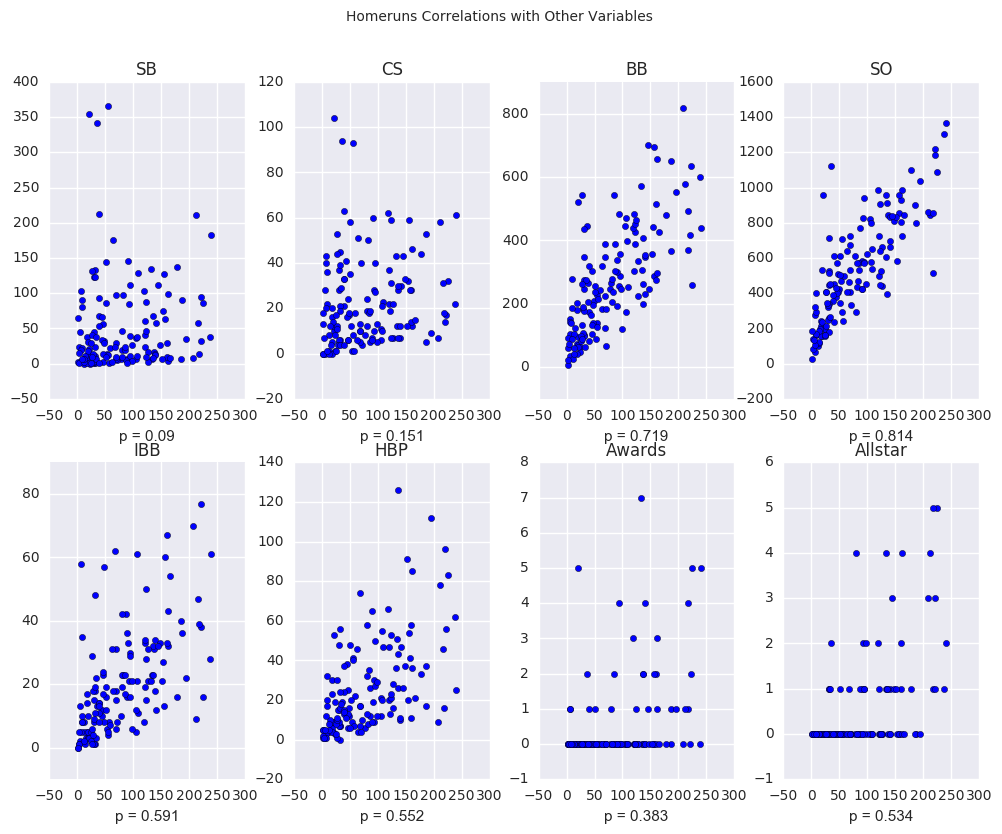

In [113]:
HRvall = df_ten_years[['HR','SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'Awards', 'Allstar']]
fig2, axes = plt.subplots(2, 4, figsize=(12,9))
fig2.suptitle('Homeruns Correlations with Other Variables')
plt.subplots_adjust(wspace=0.25)
k = 1
for i in range(2):
    
    for j in range(4):
        axes[i,j].scatter(HRvall.iloc[:,0], HRvall.iloc[:,k])
        axes[i,j].set_title(HRvall.columns[k])
        axes[i,j].set_xlabel( 'p = ' + str(round(pCorr(HRvall.HR, HRvall.iloc[:,k]),3)))
        #axes[i,j].set_ybound(lower=0); axes[i,j].set_xbound(lower=0)
        #plt.ylabel(HRvall.columns[k])
        k+= 1

The scatter plots made from players who played exactly 10 years in the league. By making career a constant, we can look at the relationship between homeruns and other metrics without time(career length) coming into effect. Since a player with more years in the league will naturally have more opportunities to get more homeruns, walks, awards, etc...

## IV. Conclusions

In this study I was able to provide evidence that higher paid players generally have higher stats across the board. With the largest differences being hits, homeruns, awards, and allstar appearances and even weight. Factoring in variability in the means and conducting hypothesis tests using 95% confidence intervals it was shown that higher salary players score higher in all the variables. A player aggregating more stats is going to be in the higher salary bracket, thus showing that salaries are largely aggregate performance based. 

Homeruns was plotted against the other variables in order to identify any linear relationship. Correlations were computed to quantify these relationships and it was found that the barring SB, CS the other variables had some strong correlation with the lowest being Awards with a Pearson's correlation of 0.383. The two highest correlations were BB with pearson's correlation of .719, and surprisingly SO with pearson's correlaton .814.

Players with more homeruns can expect to be get walked more intentionally or unintentionally possibly because pitchers are more likely to 'pitch around' batters with reputation for hitting a lot of homeruns.

My take on the strong positive correlation between homeruns and strikeouts is that baseball is a volatile sport, in that it can be expected that even the best hitters strike out a lot. A good batter can strike out many times however players who have higher salaries all tend to have higher stats in important metrics such as hits and homeruns. A player can almost make up for strikeouts by getting hits and homeruns. As long as a player can aggregate more hits and homeruns, he will most likely be a higher paid player. As such a strike out is not really as negative a stat as it seems. Of course if all a player does at the plate is consistently strike out that would be a different story.

**Limitations of the data set**

It must be mentioned that the data is limited in that it does not take into account a player's commercial value. There are players that potentially make higher salaries because of the market they play in. Factors like jersey sales and fan attendance is not available in the data. In the study itself I did not include all the variables for hitters such as GIDP, which I saw as not an important stat since players largely cannot control when they hit into double plays. GIDP can be seen as a worst outcome than SO. RBI is another stat that could be looked into more thoroughly as they translate into points and may be seen as an important metric, they were not looked into in this study.

Another limitation is that as was mentioned before correlation does not imply causation. For example more homeruns may not cause more times being walked and struck out, there may be other factors such as homerun hitters being at the top of the batting order thus receiving more batting opportunities, it may also be a natural phenomena that the more a player bats the more he should expect to be walked and struck out. Pitchers 'pitching around' batters with a lot of homeruns and power hitters striking out more are interpretations of the data. Although it would be interesting to further study these relationships for more thorough results.

In analyzing lower and high salary players, I separated them by below and above the average salary. Others may choose to define lower and higher salary players differently. One may choose to define higher paid players as being in the 75th percent quantile rather than the 50th. However my method ensures nearness in the sizes of both groups.

Others may also choose include pitchers in their study, I did not include them for the reason that pitchers are evaluated on completely different stats than other position players.

**Possible future research**

Future research on the subject of the correlation between Homeruns and Strikeouts can be done, by including more variables such as At bats and Games Played to show whether players who have more homeruns generally play in more games and have more opportunities to bat than players who get less homeruns. A more efficient means of displaying correlations between variables could also be done with a covariance matrix.

Finally, linear regression models can be constructed in order to see how well predictions can be made on salaries, and homeruns. The method for this regression would have to account for the strong right skew of the salary and homerun distributions.

## References
Mckinney, Wes. (2013). Python for Data Analysis. Sebastopol, CA: O'Reilly Media, Inc.

Diez, David. M. (2015). OpenIntro Statistics. Creative Commons.

Downey, Allen. B. (2014). Think Stats: Exploratory Data Analysis in Python. Needham, MA: Green Tea Press.

Reddit.(2016)."ELI5: What does 'Arbitration Eligible' mean?".https://www.reddit.com/r/baseball/comments/3rs70q/eli5_what_does_arbitration_eligible_mean/cwqu9ea/